# 15. 선형 회귀와 로지스틱 회귀

## 1. 회귀(Regression)에 대하여

### **회귀분석이란?**

---

**회귀분석(Regression Analysis)** 이란 통계학에서 전통적으로 많이 사용되던 분석 방법으로, 관찰된 여러 데이터를 기반으로 각 연속형 변수간의 관계를 모델링하고 이에 대한 적합도를 측정하는 분석 방법이다.

회귀분석으로 풀 수 있는 실생활 문제의 몇 가지 예시를 들어보자.

* 부모의 키와 자식의 키 사이의 관계
* 자동차의 스펙을 이용한 가격 예측
* 1인당 국민 총소득과 배기가스 배출량 사이의 관계 예측

각 문제들의 분야는 굉장히 다양하지만, 그래도 위에서 제시된 문제들 간의 공통점이 있는거 같다.

위에서 제시된 문제들은 모두 독립변수(independent variable)와 종속변수(dependent variable) 사이의 상호 관련성을 규명하는 것들이다. 독립변수와 종속변수는 각각 설명변수(explanatory variable), 반응변수(response variable)라고 불리기도 한다.

위의 예를 다시한번 살펴보면, 부모의 키라는 변수는 자식의 키라는 반응변수의 분포를 잘 설명해 주는 설명변수의 역할을 잘 한다고 할 수 있을까? 다시 말해, 부모의 키를 독립변수로 본다면 자식의 키는 부모의 키에 비례해서 커지는 종속변수로 볼 수 있을까? 이때 두 변수 사이의 관계식을 규명해 낼 수도 있을까?

이러한 문제를 처음으로 파고들어, 회귀(Regression)라는 개념을 처음 제시한 사람은 영국의 우생학자 F. Galton(1822~1911)라고 한다. 아래 그림은 당시 Galton이 분석하였던 아버지의 키와 자식의 키 사이의 관계에 대한 원본 데이터와, 이를 토대로 그려본 직선 형태의 함수 관계도이다.

<img src="./image/regression.png" />
<center>[출처 : http://www.biostat.jhsph.edu/courses/bio653/misc/JMPer%20Cable%20Summer%2098%20Why%20is%20it%20called%20Regression.htm]</center>

이때 Galton은 아버지의 키 $x$와 자식의 키 $y$ 사이의 직선 형태의 기울기가 1보다 작다는 것에 주목하였는데, 이것은 세대를 거듭할수록 아버지의 키가 크던 작던 무관하게 자식의 키는 전체 평균에 수렴하게 된다는 것을 의미한다. 그래서 그는 통계적으로 평균으로 회귀(regression)한다는 뜻에서 회귀(Regression)라는 개념을 처음 제시한 것이었다고 한다.

하지만 오늘날 회귀분석이란 단순히 평균으로 수렴하는 현상을 넘어서서, 두 개 이상의 변수 사이의 함수관계를 추구하는 통계적 방법을 의미하게 된다.

위 그림에서 본 것처럼 두 변수 사이의 관계를 직선 형태로 가정하고 분석하는 것을 선형 회귀분석(Linear Regression)이라고 한다. 선형 회귀분석은 간단하면서도 실생활에 적용되는 경우가 정말 많기 때문에 **선형 회귀분석의 기본 가정** 내에 문제가 들어온다면 일단 먼저 회귀 분석을 시도해볼 만큼 문제를 해결할 때 많이 이용하게 되는 보편적인 방식이다. 만약 회귀분석을 통해 우리가 예측하고자 하는 종속변수가 우리가 확보하고 있는 독립변수 데이터와의 명확한 관계가 규명된다면, 새로운 종속변수 데이터에 대한 예측 가능성이 새롭게 얻어질 것이다.

여기서 선형 회귀분석의 표준 가정이란 회귀분석 대상 변수들이 가져야 할 <br>
1)선형성 <br>
2)독립성 <br>
3)등분산성 <br>
4)정규성 이라는 4가지 조건을 의미한다. 여기에 대한 보다 자세한 내용은 아래 링크의 글을 참고

* (참고) [선형 회귀분석의 4가지 기본가정](https://kkokkilkon.tistory.com/175)

### 지도학습의 두 종류 : 분류와 회귀
---
그동안 공부해 왔던 머신러닝은 대부분 데이터 $X$에 대한 정답 $y$가 주어지는 지도학습이었다. 지도학습은 크게 분류(classification)와 회귀(regression) 문제로 나뉜다. 이 두가지 개념은 어떻게 다른 것일까?

* 분류 : 데이터 $x$의 여러 feature 값들을 이용하여 해당 데이터의 **클래스 $y$를 추론**하는 것
* 회귀 : 데이터 $x$의 여러 feature 값들을 이용하여 연관된 다른 데이터 $y$의 **정확한 값을 추론**하는 것

그러므로 분류 모델의 경우 클래스를 추론하기 위해 클래스별 확률값을 출력하게 되지만 회귀 모델의 경우는 연관된 종속변수 값을 직접 출력하는 형태로 모델 구성이 다소 달라지게 된다. 그럼 회귀 모델의 특성을 좀더 구체적으로 알아보자.

## 2. 선형 회귀 분석(Linear Regression)

선형 회귀 분석은 회귀 분석을 대표하는 가장 대표적인 방법이다. 회귀 분석을 얘기할 때 대부분이 바로 떠올리는 방법이 바로 이 선형 회귀분석이다. 실생활에서 많이 접할 수 있는 문제들이기도 하고, 노드 초반에 회귀분석의 예시로 들었던 것들 또한 선형 회귀분석으로 접근하는 문제들이다.

선형 회귀(linear regression)는 이름에서 알 수 있듯이, **종속변수 Y와 한 개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법**이다. 여기서 독립변수의 개수에 따라 한 개의 독립변수를 가지고 있는 방식은 단순 선형회귀, 둘 이상의 독립변수를 가지고 있는 경우에는 다중 선형회귀라고 부른다.

### **1. 선형 회귀 모델링**

---

선형회귀식은 다음과 같이 나타낼 수 있다.

$$y=\beta x + \epsilon$$

여기서 $\beta$는 **회귀계수**라고 불리며, $\epsilon$는 종속 변수와 독립 변수 사이에 **오차**를 의미한다. 이들은 우리가 데이터로부터 추정해야 하는 **파라미터**가 된다. 결국 우리는 $x$와 $y$에 해당하는 데이터가 있을 때, 이러한 데이터로부터 $\beta$와 $\epsilon$를 추정한 후 추정한 값들을 바탕으로 모델링을 수행한다. 그 다음 해당 모델을 기반으로 새로운 데이터의 $x$값들을 입력으로 넣어주었을 때, 그에 해당하는 $y$ 값을 추론하게 되는 것이다. 그렇다면 결국 선형회귀 모델을 찾는다는 것은 쉽게 말하면, **주어진 데이터에 우리의 선형 식이 잘 맞도록 회귀계수 및 오차를 구하는 것** 을 의미한다.

### **2. 머신러닝에서의 선형회귀모델 표기법**

---

위에서 표현했던 선형회귀모델을 머신러닝 기반의 방법에서는 조금 다른 변수값을 써서 표현하는데, 다음과 같이 표시한다.

$$H = Wx + b$$

위의 식에서는 $H$를 가정(Hypothesis), $W$를 가중치(Weight), $b$를 편향(bias)로 명명한다. 결국 우리가 머신러닝 혹은 딥러닝 기법을 이용해서 회귀 모델을 구한다는 얘기를 많이 하는데, 바로 주어진 데이터를 이용하여 이 $W$와 $b$를 구하기 위함이다. 위에서 설명했던 회귀모델에서의 회귀계수 $\beta$ 값이 $W$, 에러 값이 $b$에 해당하는 것이다. 참고로 대부분의 경우 $W$, $b$는 단순 스칼라 값이 아닌 고차원의 행렬(matrix) 형태를 띄고 있는 경우가 많고, 이 파라미터의 개수가 많을 수록 모델의 크기가 커지고 학습하는 것도 어렵다.

### **3. 용어 설명**

---

**잔차(Residuals)** 란 우리가 **회귀모델을 이용해 추정한 값과 실제 데이터의 차이**를 의미한다. 만일 우리가 `(2,8)` 이라는 데이터를 가지고 있고, 선형 회귀모델의 식이 $y=2x+3$이라고 가정한다면, 해당 데이터에 대한 잔차 값은 `8(실제 데이터의 y값) - 7(실제 데이터의 x값을 모델에 대입했을 때의 추론된 y값) = 1`이 되는 것이다. 그리고 최소제곱법은 이 잔차를 이용하여 주어진 점 데이터들을 가장 잘 설명하는 회귀모델을 찾는 가장 대표적인 방법 중 하나이다. 최소제곱법의 정의는 다음과 같다.

$$argmin\_{W, b}({\sum\_{i=1}^{n}}residuals^2)$$

즉, **n 개의 점 데이터에 대하여 잔차의 제곱의 합을 최소로 하는 W, b를 구하는 방법**이다. <br>
실제 코드를 통해 잔차를 한번 계산해보고, 최소제곱법을 이용해 보도록 하자. 참고로 머신러닝에서는 최소제곱법과 같은 회귀계수를 구하는 과정에 쓰는 함수를 손실함수(Loss function)이라고 한다. 당연히 손실함수의 종류는 여러 가지가 있지만, 이번 글에서는 최소제곱법을 이용해보았다.

아 참, 또 회귀모델이 잘 결정되었는지 확인할 때 참고하는 지표로 **결정계수(R-squared**, 또는 **R2 score** 등으로 표기)라는 것이 있다. 이는 0에서 1 사이의 값으로 나타나는데, 1에 가까울수록 해당 회귀모델이 데이터를 잘 표현하고 있다고 볼 수 있다.

R2 score에 대한 보다 자세한 설명은 아래 링크의 글을 참고.<br>
(참고) [R-squared, 결정계수](https://jihongl.github.io/2017/09/16/Rsquared/)

그러면 실제 코드를 통해서 Boston dataset의 각각의 attribute에 선형 회귀 모델을 구해보고, 이 모델의 결정계수를 확인해보자.

### 4. 데이터셋 준비하기(Boston house prices dataset)
---
데이터셋은 sklearn 라이브러리에서 기본으로 제공하는 Boston house prices dataset을 활용할 것이다. 그럼 다음 파이썬 코드를 통해 해당 데이터셋을 어떻게 불러오고, 데이터셋에 대한 정보를 확인하는 방법은 무엇인지 한 번 알아보자.

In [1]:
# boston house prices dataset에 대한 정보
from sklearn.datasets import load_boston
from sklearn import model_selection
import pandas as pd
import numpy as np

# 데이터 로드
boston = load_boston()
data, price = boston['data'], boston['target']
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, price, test_size=0.2)

df = pd.DataFrame(x_train, columns=boston['feature_names'])
print("boston dataset의 차원: ", data.shape)
print("price의 차원", price.shape)
print("boston train dataset의 차원: ", x_train.shape)
print("boston test dataset의 차원: ", x_test.shape)

print("Boston dataset의 예시")
df.head() # data 요약

boston dataset의 차원:  (506, 13)
price의 차원 (506,)
boston train dataset의 차원:  (404, 13)
boston test dataset의 차원:  (102, 13)
Boston dataset의 예시


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
1,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81
2,15.86030,0.0,18.10,0.0,0.679,5.896,95.4,1.9096,24.0,666.0,20.2,7.68,24.39
3,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
4,0.22969,0.0,10.59,0.0,0.489,6.326,52.5,4.3549,4.0,277.0,18.6,394.87,10.97


Boston dataset은 총 506 row, 13가지의 attribute로 구성되어 있다. 그리고 각 row에 대응되는 가격(price)의 값이 `price`에 저장되어 있다. 데이터의 각 attribute가 의미하는 바가 무엇인지 궁금하다면, `print(boston["DESCR"])`를 수행함으로써 각 attribute에 대한 설명을 확인할 수 있다.

In [2]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### 5. Boston Dataset에 Linear Regression 적용해보기
---

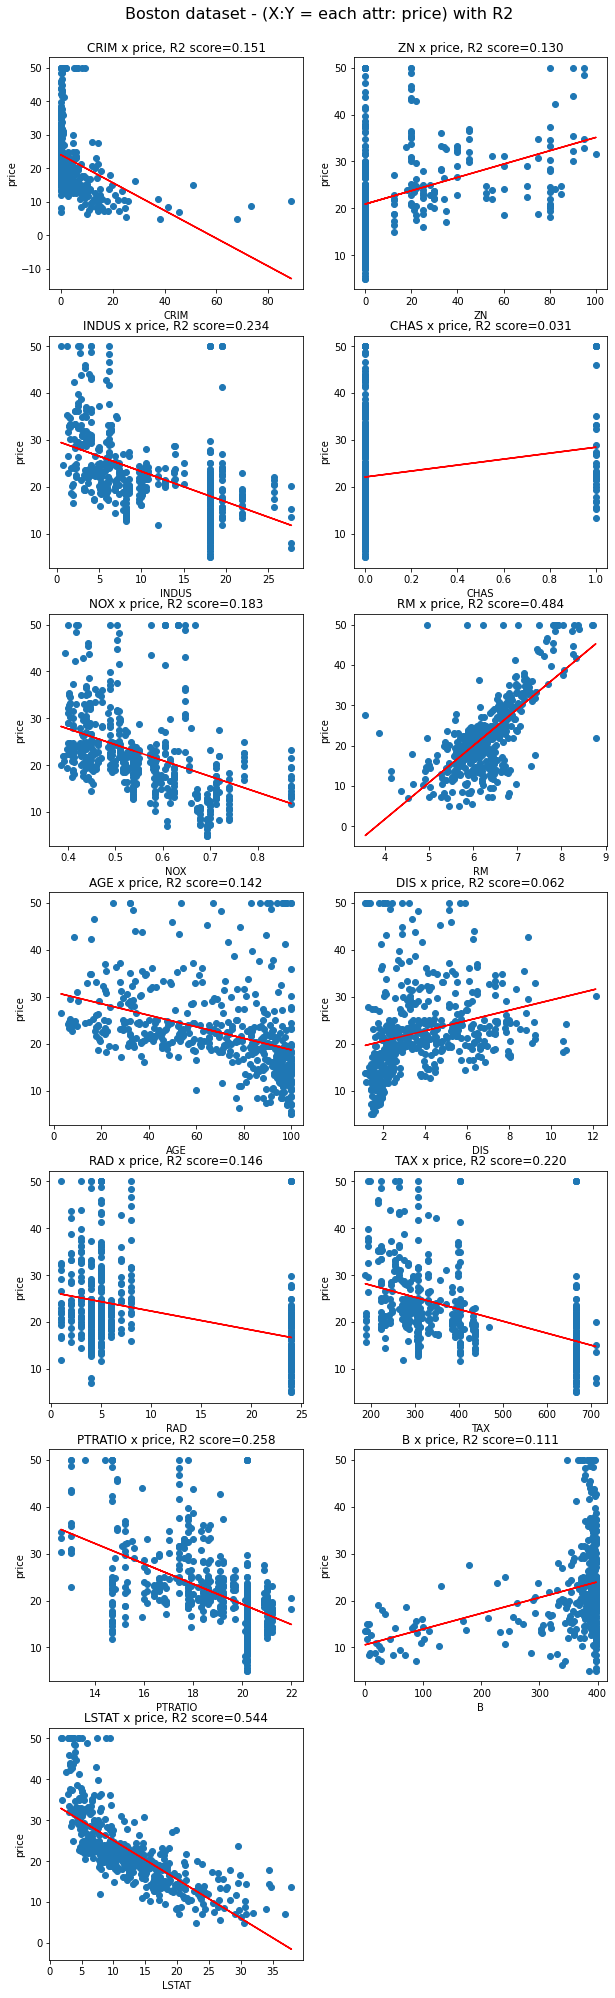

In [3]:
# Boston dataset의 각 attribute에 선형회귀 적용하는 예제

import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,35))
fig.suptitle('Boston dataset - (X:Y = each attr: price) with R2', fontsize=16, y=0.9)

for i in range(data.shape[1]): # boston dataset에서 i번째 attribute(column)을 살펴볼 거에요.

    single_attr, attr_name = data[:, i].reshape(-1, 1), boston['feature_names'][i] # i번째 attribute에 대한 data 및 이름
    estimator = LinearRegression() # 선형 회귀 모델이에요.

    #x에는 single_attr, y에는 price에 해당하는 데이터를 대입해서 최소제곱법을 이용하여 모델 내에서 W, b를 구하는 과정이에요
    estimator.fit(single_attr, price) 

    #위 fit() 과정을 통해 구한 회귀계수를 기반으로 회귀모델에 X값을 대입했을 때의 예측 Y 값이에요. 
    pred_price = estimator.predict(single_attr)

    score = metrics.r2_score(price, pred_price) # 결정계수를 구하는 함수에요. 

    # 캔버스 생성
    ax = fig.add_subplot(7, 2, i+1)
    ax.scatter(single_attr, price) # 실제 데이터에 대한 산포도
    ax.plot(single_attr, pred_price, color='red') # 선형회귀모델의 추세선
    ax.set_title("{} x price, R2 score={:.3f}".format(attr_name ,score)) #subplot의 제목이에요
    ax.set_xlabel(attr_name) # x축
    ax.set_ylabel('price') # y축

위에서 보았듯이, R2 score가 높은 편에 속하는 LSTAT(R2=0.544)과 RM(R2=0.484)을 이용하여 그린 선형회귀 모델이 그나마 데이터를 잘 설명한다고 볼 수 있다. 자세히 보면, 두 데이터가 전반적으로 회귀선을 따라서 잘 모여있는 것을 확인할 수 있다.

### **6. 경사 하강법(Gradient Descent Algorithm)**

---

적절한 회귀모델의 회귀계수를 찾기 위해서는 결국 손실함수를 잘 설정하는 것이 중요하다. 주어진 데이터에 대하여 손실함수를 최소화하는 $W$와 $b$를 구하는 것이 결국 핵심이기 때문이다. 그렇기 위해서는 손실함수의 형태가 주어진 데이터의 분포를 잘 반영하는 것이 중요하겠지만, 우리는 데이터의 분포가 어떠한지 항상 알 수 있는 것은 아니다. 따라서 머신러닝에서는 가중치의 그래디언트(미분값)가 최소가 되는 지점이 손실함수를 최소로 하는 지점일 것이라는 가정을 한다. 왜냐하면 보통 가중치 함수는 아래로 볼록한 형태이기 때문이다. 아래 그림을 한번 살펴보자.

<img src="./image/GD.png" />
<center>[출처 : https://lsh424.tistory.com/9]</center>

$J$($W$)를 최소로 하는 가중치 값을 가지려면, 기울기(그래디언트) 값이 가장 작은 중앙에 놓는 것이 좋다. 손실함수를 최소로 하는 가중치를 한번에 알아낼 수 있으면 좋겠지만, 가중치 파라미터의 개수가 많을 경우에는 어마어마한 시간이 걸리는 경우가 많기도 하고 무조건 최적의 가중치를 찾아낼 수 있는 것도 아니다. 저 최소 지점으로 가기 위해, 그래디언트 값을 다음과 같은 식으로 업데이트를 한다. 

$$W := W-\alpha\frac{\partial}{\partial W}J(W)$$

여기서 $\alpha$에 해당하는 값이 우리가 많이 듣던 learning rate라는 것이다. 이 값이 클수록 그림의 화살표의 길이가 길어져서 좀 더 빠른 수렴이 가능하다. 하지만 learning rate가 너무 크게 되면 최적의 W값을 건너뛰며 진행하는 경우가 생겨서 오히려 수렴하지 못하는 경우도 생기기 때문에 적절한 learning rate를 선정하는 것이 머신러닝&딥러닝에서는 굉장히 중요하다.

## 3. 로지스틱 회귀분석(Logistic Regression)

**로지스틱 회귀분석(Logistic Regression)** 이란 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 **분류해주는 지도 학습 알고리즘**이다. 쉽게 말하면, 선형회귀분석과 비슷한데 Y값이 확률로 되어 있기 때문에 하한, 상한이 0, 1 사이로 정해져 있다. 그리고 특정 threshold 값을 기준으로 삼아서 예측된 확률 값이 threshold 이상인 것과 미만인 것으로 분류를 하는 식이다. 즉 1개 이상의 독립변수가 있을 때 이를 이용하여 데이터가 2개의 범주 중 하나에 속하도록 결정하는 **이진 분류(binary classification)** 문제를 풀 때 로지스틱 회귀분석을 많이 사용한다.

### **1. 정의 및 용어 설명**

---

로지스틱 회귀식은 다음과 같이 나타낼 수 있다. 만일 종속변수가 0일 확률을 $P(y=0|x)$라고 한다면, 이를 구하는 식은 다음과 같다.

$$LogOdds = log(\frac{P(y=0|x)}{1-P(y=0|x)}) = \beta_0 + \sum\_{j=1}^{p}\beta\_j x\_j$$

Odds라는 개념은 사건이 발생할 확률을 발생하지 않을 확률로 나눈 값이다. 유방암 데이터셋에 맞추어 설명한다면, 만일 악성 종양일 확률이 0.2라면 양성 종양일 확률은 자동적으로 0.8이 되니까 다음과 같이 Odds를 계산할 수 있다.

$$Odds(Malignant) = \frac{P(Y=0|x)}{P(Y=1|x)} = \frac{P(Y=0|x)}{1-P(Y=0|x)} =\frac{0.2}{0.8} = 0.25$$

위 값에 log를 취한 값을 Log-odds라고 부른다. 그런데 이 Log-odds의 형식이 맨 처음 나온 좌변의 식과 같다. 결국에는 이 log-odds라는 값을 선형회귀분석의 종속변수처럼 구하면 되는 것이다.

$$log(\frac{P(Y=0|x)}{1-P(Y=0|x)}) = log(0.25) = \beta\_0 + \sum\_{j=1}^{p}\beta\_j x\_j$$

위와 같은 식에 주어진 데이터를 이용하면, 주어진 데이터를 잘 설명하는 회귀계수($\beta$) 값을 구할 수 있다. 이렇게 로지스틱 회귀모델이 구성되는데, 이 회귀모델은 수식적으로 볼때 Log-odds의 선형 회귀모델이라고 할수도 있겠다.

그런데 실제로 우리가 원하는 값은 log-odds 값일까? 우리는 종속변수가 0일 확률, 1일 확률 자체를 원하는 것이지 log-odds 자체의 값이 필요하지는 않다. 그래서 log-odds로부터 특정 범주에 속할 확률을 얻기 위해 log-odds의 식을 $P(Y=0|x)$에 대해서 다시 정리하게 되면,

$$P(y=0|x) = \frac{exp({\beta}\_0 + \sum\_{j=1}^{p}{\beta}\_{j}x\_j)}{1+exp({\beta}\_0 + \sum\_{j=1}^{p}{\beta}\_{j}x\_j)}$$

와 같은 식을 얻게 된다. $z = exp({\beta}\_0 + \sum\_{j=1}^{p}{\beta}\_{j}x\_j)$ 라고 한다면, 식은 보다 간결하게 표현된다.

$$P(y=0|x) = \frac{1}{1+exp(-z)}$$

<img src="./image/sigmoid.png" />
<center>[출처 : https://medium.com/@toprak.mhmt/activation-functions-for-deep-learning-13d8b9b20e]</center>

이것이 바로 앞으로 머신러닝 혹은 딥러닝을 공부하면서 많이 보게 될 sigmoid function의 형태이다. 결국 Log-odds 값을 구한다음, 이를 sigmoid function에 넣어서 0에서 1 사이의 값으로 변환해주는 것이다. 이 함수는 확률모델을 선형 회귀모델로 표현한 것이 아니라, 위 그래프에서 $z=0$인 지점을 중심으로 하여 두 범주간 경계가 불명확해지는 $x$의 구간(0.3<p<0.7)을 최소화해 주기 때문에 분류모델의 분류 성능을 매우 향상시켜 준다.

정리하자면, 로지스틱 회귀에서는 데이터가 특정 범주에 속할 확률을 예측하기 위해 아래와 같은 단계를 거친다.

```txt
1. 실제 데이터를 대입하여 Odds 및 회귀계수를 구한다.
2. Log-odds를 계산한 후, 이를 sigmoid function의 입력으로 넣어서 특정 범주에 속할 확률값을 계산한다.
3. 설정한 threshold에 맞추어 설정값 이상이면 1, 이하면 0으로 이진분류를 수행한다.
```

### 2. 데이터 개요
---
본 로지스틱 회귀분석 예제에서는 비지도학습 노드에서 사용하였던 유방암 데이터셋을 한번 더 사용할 것이다. 로지스틱 회귀분석으로 접근하기 가장 적합한 이진 분류이기 때문이다.

In [4]:
# 로지스틱 회귀분석 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y = 0(Malignant - 악성 종양), y=1(Benign - 양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print("전체 검사자 수: {}".format(len(cancer_X)))
print("Attribute 수: {}".format(len(cancer_X[0])))
print("Train dataset에 사용되는 검사자 수: {}".format(len(train_X)))
print("Test dataset에 사용되는 검사자 수: {}".format(len(test_X)))
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Attribute 수: 30
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 3. 로지스틱 회귀분석 예제
---

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

LR = LogisticRegression() #로지스틱 회귀분석
LR.fit(train_X, train_y) # 유방암 train data를 이용하여 로지스틱 회귀분석 모델 학습
pred = LR.predict(test_X) # 학습된 로지스틱 회귀분석 모델을 이용한 예측값 출력


# 로지스틱 회귀분석 모델의 예측값과 실제값 비교결과를 나타낸 통계표
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        21
           1       0.97      0.94      0.96        36

    accuracy                           0.95        57
   macro avg       0.94      0.95      0.94        57
weighted avg       0.95      0.95      0.95        57



/home/aiffel-dj10/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


sklearn에서 제공하는 `LogisticRegression()` 모듈을 이용하면 코드 몇줄을 통해 log-odds 계산 등 많은 중간 단계를 생략하고 꽤 높은 Precision, Recall로 유방암 test data에 대한 분류를 수행할 수 있는 로지스틱 회귀모델을 학습할 수 있다.

### 4. 여기서 잠깐!
---
**로지스틱 회귀는 과연 회귀 모델일까, 아니면 분류 모델일까?** 분명히 이름은 회귀인데 조금전까지 우리가 로지스틱 회귀를 이용해 풀어보았던 예제는 유방암 데이터셋을 이용한 이진 분류 문제였다.

결론부터 말하면, 로지스틱 회귀는 '회귀' 모델이 맞다. 모델이 리턴하는 값이 연속적인 변수라는 점에서 로지스틱 회귀는 회귀 모델의 정의에 부합한다. 단지, 이전 스텝에서 보았던 선형 회귀모델이 종속변수 $y$의 추정치 자체를 리턴하는 것에 비해, 로지스틱 회귀모델은 모델이 리턴하는 값이 바로 데이터 $x$가 어떤 범주에 속할 확률이라는 점이 독특할 뿐이다. 하지만 확률변수도 연속적인 변수인 건 마찬가지일 것이다.

그렇다면 우리는 회귀모델인 로지스틱 회귀를 어떻게 분류 문제에 활용한 것일까? 엄밀히 말하면 회귀모델로서의 로지스틱 회귀는 $x$가 속할 범주별 확률값을 계산하는 곳까지아다. 이후 $argmax$ 등을 이용해 이 확률값이 최대가 되는 범주를 골라 $x$가 어떤 범주에 속하는지 예측하는 것은 로지스틱 회귀모델을 활용하는 응용 과정에 불과한 것이다. 하지만 로지스틱 회귀는 그렇게 분류 문제를 확률적으로 접근하는 핵심 아이디어를 제공하므로 잘 알아두도록 하자.

## 4. Softmax 함수와 Cross Entropy

딥러닝 및 머신러닝에서 많이 등장하는 softmax 함수와 Cross entropy에 대해 알아보겠다.

### **1. Softmax 함수**

---

이전 스텝에서 이진 분류를 수행하는 로지스틱 회귀를 살펴보았다. 하지만 로지스틱 회귀는 이진 분류 뿐 아니라 여러 범주로 분류하는 다중 로지스틱 회귀(Multinomial Logistic Regression)으로 확장될 수 있다. 이때, 이전 스텝에서 다룬 시그모이드 함수는 다음과 같이 여러 범주로 분류하는 함수, 즉 softmax 함수로 확장되어야 한다.

Softmax 함수는 **2가지가 아닌 여러 범주로 분류하는 함수이다**. Multi class classification에 적합한 함수라고 볼 수 있다. softmax function의 정의는 다음과 같다.

$$softmax(x) = \frac{x\_i}{\sum\_{j=0}^{k}e^{x\_j}}(i=0,1,... k)$$

함수식을 자세히 보면 이는 각 범주의 확률값이 0에서 1 사이의 값이고, 또 하나의 큰 특징은 모든 범주에 해당하는 softmax의 값을 전부 더했을 때 그 합이 1이 된다는 것이다. 또한 softmax 함수는 큰 log-odds와 작은 log-odds의 차이를 극대화시켜준다. 그렇기 때문에 마지막에 softmax 함수에 모든 범주의 log-odds를 통과시키면 해당 데이터가 어떤 범주로 분류되는지 확실히 알 수 있게 되는데, 가장 큰 값을 1, 그 외 나머지 값들을 0으로 인코딩하는 one-hot encoding을 통해 표현하게 된다.

### **2. Cross Entropy**

---

Cross entropy 함수는 위에서 살펴보았던 softmax 함수의 손실함수로 쓰인다. 식은 다음과 같다.

$$H(p, q) = -\sum_{x}p(x)logq(x)$$

이 역시 손실함수이기 때문에 가중치가 최적화될수록 `H(p,q)`의 값이 감소하게 되는 방향으로 가중치 학습이 된다. 그리고 `p(x)`는 실제 데이터의 범주 값, `q(x)`는 softmax의 결과값을 대입하게 된다.

그런데 손실함수로 Cross entropy 함수가 선택된 이유는 무엇일까? 그렇다면 이전 스텝에 다루었던 선형회귀의 경우와 비교해보자.

선형회귀에서의 손실함수는 잔차(residual)의 제곱의 합이었다. 잔차의 제곱은 L2 distance와는 다소 다르지만, 회귀 모델의 추정치와 실제 값의 종속변수 좌표축 방향으로의 차이, 즉 거리를 측정하기에 적절한 형태를 가지고 있다.

그런데 로지스틱 회귀에서는 종속변수 방향이 바로 확률변수 방향이다. 그렇다면 이 손실함수를 선형회귀 때처럼 잔차의 제곱 형태로 측정하는 것이 타당할까? 확률 0.4와 0.6 사이의 거리는 과연 0.8과 1.0 사이의 거리와 같다고 할수 있을까? 아니라면 어떤 방법이 더 적당할까?

여기서 좀 어렵지만 정보이론(Information Theory)을 빌린 설명이 필요하다. 아주 개념적으로 말하자면 Cross Entropy는 로지스틱 회귀모델이 추론한 확률 분포 $q(x)$와 실제 데이터의 분포 $p(x)$의 차이를 계산한 것이다. 이 차이가 적을수록 Cross entropy가 작아지게 된다. 여기에 대한 보다 명확한 설명은 아래 링크의 설명을 참고.

(참고)

* [왜 크로스 엔트로피를 쓸까?](https://theeluwin.postype.com/post/6080524)
* [Cross-entropy 의 이해: 정보이론과의 관계](https://3months.tistory.com/436)

### **3. 유방암 데이터셋을 이용한 softmax 및 cross entropy 예제**

---

그럼 이전 스텝에서 다루었던 `sklearn`의 `LogisticRegression`을 이용해 다루어 보았던 유방암 데이터셋을 이용한 로지스틱 회귀를 Tensorflow API를 이용해 다시 구현해 보겠다.

다음 코드는 어떻게 보면 딥러닝의 첫걸음으로 나아가는 발판이 되는 코드이기도 하다. 실제로 multi-class classification 문제를 풀 때 자주 사용하는 방법이니 예제 코드를 통해서 딥러닝과 조금 친해지는 계기가 되었으면 좋을 것 같다.

다만, 다음 코드는 Tensorflow V2가 아닌 V1 기준으로 작성된 것이다. 우리가 V2 코드에서 일반적으로 사용하는 `model.fit()` 함수를 사용해서 학습을 진행하면 실제로 gradient descent가 진행되는 과정을 보다 면밀히 관찰하기 어렵기 때문이다. 물론 Tensorflow V2에서도 `GradientTape`를 사용하면 가능하지만, 이것은 다음에 다시 배우도록 하자.

아래 코드에 나오는 `train_X`, `train_y`, `test_X`, `test_y` 데이터는 이전 스텝에서 생성한 것을 그대로 사용한다.

In [6]:
import tensorflow.compat.v1 as tf
import numpy as np
tf.compat.v1.disable_eager_execution()

x = tf.placeholder(tf.float32, [None, 30]) # 30개의 attribute를 가진 유방암 데이터셋
y = tf.placeholder(tf.float32, [None, 2]) # 악성, 양성 label에 one-hot encoding을 적용하여 2차원이 될 예정 
num_classes = 2 # 악성, 양성
lr = 0.0003 # learning rate

W = tf.Variable(tf.random_normal([30, num_classes]), name='weight') # 가중치
b = tf.Variable(tf.random_normal([num_classes]), name='bias') # bias

logits = tf.matmul(x, W) + b # log-odds에 해당되는 값
hypothesis = tf.nn.softmax(logits) # log-odds에 softmax 적용한 값

loss_i = tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=y) # i번째 변수의 p(x)*log(q(x))
loss = tf.reduce_mean(loss_i) # 이를 모두 summation한 최종 loss function

#최적화함수로 gradient descent method 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(loss)

pred = tf.argmax(hypothesis, 1) # hypothesis의 결과 큰 값을 1, 작은 값을 0으로 매핑
correct_pred = tf.equal(pred, tf.argmax(y, 1)) # 예측값과 ground truth 값을 비교해서 같으면 True, 다르면 False
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32)) # True는 1, False는 0이 되기 때문에 전체 평균값이 결국 accuracy가 됩니다.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) # Tensorflow의 전역 변수 초기화
    one_hot_train_y = np.eye(num_classes)[train_y] # one-hot encoding을 수행한 train data 라벨
    one_hot_test_y = np.eye(num_classes)[test_y] # one-hot encoding을 수행한 test data 라벨
    
    # 전체 train data를 1000번 iteration
    for step in range(1000):
        sess.run(optimizer, feed_dict={x: train_X, y: one_hot_train_y}) # train data로 학습
        test_loss, test_acc= sess.run([loss, accuracy], feed_dict={x: test_X, y: one_hot_test_y}) #학습된 모델을 통해 측정한 test data의 loss 값 및 정확도
        if step % 10 == 0: # 10번째 step마다 print 수행
            print("Step {}, loss: {:.3f} accuracy: {:.3f}".format(
            step, 
            test_loss,
            test_acc
            ))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Step 0, loss: 45.929 accuracy: 0.316
Step 10, loss: 118.085 accuracy: 0.368
Step 20, loss: 81.171 accuracy: 0.368
Step 30, loss: 55.145 accuracy: 0.386
Step 40, loss: 107.805 accuracy: 0.368
Step 50, loss: 9.303 accuracy: 0.789
Step 60, loss: 58.003 accuracy: 0.632
Step 70, loss: 11.615 accuracy: 0.754
Step 80, loss: 55.921 accuracy: 0.632
Step 90, loss: 12.212 accuracy: 0.754
Step 100, loss: 41.425 accuracy: 0.667
Step 110, loss: 24.224 accuracy: 0.684
Step 120, loss: 28.359 accuracy: 0.684
Step 130, loss: 25.752 accuracy: 0.684
Step 140, loss: 24.675 accuracy: 0.702
Step 150, loss: 21.708 accuracy: 0.737
Step 160, loss: 8.601 accuracy: 0.860
Step 170, loss: 5.818 accuracy: 0.912
Step 180, loss: 5.807 accuracy: 0.912
Step 190, loss: 5.795 accuracy: 0.912
Step 200, loss: 5.784 accuracy: 0.912
Step 

step을 거듭할수록 가중치와 편향이 최적화되어서 loss 값이 점점 줄고, 정확도 또한 높아지는 것을 확인할 수 있다. 하지만 이를 위해서는 learning rate 등 하이퍼파라미터 사용에 주의하자.

위 코드는 그동안 익숙하지 않았던 Tensorflow V1 기준으로 작성되어 보기가 불편하다. <br>
Tensorflow V1에서는 `with tf.Session()` 위쪽에 있는 모델 선언부와 `with tf.Session()`문 안에 있는 실행부로 코드가 크게 나뉜다. 그래서 모든 코드의 실제 수행은 `sess.run()` 안에서만 진행된다는 특징이 있다.

그럼 이번에는 위와 동일한 코드를 Tensorflow V2 기준으로 다시 작성해서 수행해 보겠다. 위의 Tensorflow V1 코드가 V2에서는 어떻게 바뀌는지 확인하자.

In [7]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()
model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax', input_shape=(30,)))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 62        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 25us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 2/20
512/512 [==============================] - 0s 30us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 3/20
512/512 [==============================] - 0s 31us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 4/20
512/512 [==============================] - 0s 30us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 5/20
512/512 [==============================] - 0s 32us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 6/20
512/512 [==============================] - 0s 26us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 7/20
512/

그런데 가만 보면, 이 코드는 그동안 우리가 많이 사용했던 딥러닝 분류모델 코드와 매우 유사하다는 것을 알 수 있다.

실제로 우리가 딥러닝 모델을 구현하는 과정도 로지스틱 회귀를 구현하는 것과 매우 유사하다. 로지스틱 회귀가 그러했던 것처럼, 우리는 분류모델이 Softmax를 통해 범주별 확률 예측값을 만들게 하고 이것을 최대로 만드는 범주를 선택하는 방법을 써왔다. 단지, 분류모델을 설계할 때 위 코드처럼 Dense 레이어 하나만을 사용하는 것이 아니라 레이어를 여러장 깊게 쌓는 방법을 써왔다.

그러면 이번에는 위 코드를 조금만 바꿔서, 딥러닝 모델로 변형해서 수행해보자.

In [8]:
import tensorflow as tf
from tensorflow import keras

n_dense=30
n_train_epoch=20
num_classes = 2 # 악성, 양성

model=keras.models.Sequential()

#레이어 3장을 추가
model.add(keras.layers.Dense(n_dense, input_shape=(30,), use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))
model.add(keras.layers.Dense(n_dense,  use_bias=True))

model.add(keras.layers.Dense(num_classes, use_bias=True, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(train_X, train_y, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(test_X, test_y, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 62        
Total params: 2,852
Trainable params: 2,852
Non-trainable params: 0
_________________________________________________________________
Train on 512 samples
Epoch 1/20
512/512 [==============================] - 0s 33us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 2/20
512/512 [==============================] - 0s 32us/sample - loss: 6.0128 - accuracy: 0.6270
Epoch 3/20
512/512 [===

어떤가? 이번 유방암 데이터셋의 경우에는 512개밖에 되지 않은 작은 데이터셋이므로 레이어를 깊게 쌓는다고 해서 성능 향상에 크게 유리한 점은 아마 없을 것이다. 아마 로지스틱 회귀만으로도 충분히 좋은 성능을 보여주는 것을 확인할 수 있을 것이다.

하지만 회귀 모델의 원리를 통해서 어떻게 딥러닝으로 확률 모델을 구현하는 것이 분류 문제 해결에 사용되는지의 기본 원리를 파악하는 데에 도움이 되었을 것이다.

## 5. 정리 및 요약

<img src="./image/sum.png" />